# Lab Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the Lab assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the Lab assignment.

## The Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. \[You will learn about PCA in a later Lesson.\] Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

## Question 1: /5 pts

**Read** in the `creditcard.csv` dataset and **display** the first 5 rows.


In [1]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Question 2: /5 pts

Then **split the data** into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [3]:
# Spliting the data for Q3
x = credit_card_data['Amount'].values
y = credit_card_data['Class'].values

In [4]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0)

## Question 3: /5 pts 

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words:

1. **Does `LogisticRegression` use a penalty by default?**  If yes, **what penalty?**

  The sklearn `LogisticRegression` uses a L2 penalty by default
  
    
2. If we apply a penalty during learning, **what difference do you expect to see in the resulting coefficients**, relative to not applying a penalty during learning?

      
      L1: Ridge Regression generates a model involving ALL features
      L2: Lasso has the effect of removing some of the coefficients
      Both methods: as theta increases, the variance decreases and the bias increases
      Elastic Net: a combination of both penalties
    
    
3. If using the **default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix?** Briefly **explain why or why not.**

  No this is not needed as they are already included.
 

## Question 4: /15 pts

* **Create** a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  Use `max_iter=10000` which seems to supress the warning.


* Using this object, **run a logisitic regression analysis of `Class` (y-variable) against `Amount` (x-variable) using your training data.** 


* Then **make a scatter-plot of `Amount` and `Outcome` on your test data** and add the class prediction (0 or 1, using `predict`) and the predicted probability of a positive outcome (using `predict_proba`). Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1).

In [5]:
clf = LogisticRegression(max_iter=10000)
clf.fit(x_train.reshape(-1, 1), y_train)

LogisticRegression(max_iter=10000)

In [6]:
predict = clf.predict(x_test.reshape(-1, 1))
probability = clf.predict_proba(x_test.reshape(-1, 1))

<AxesSubplot:title={'center':'Plotting Test Predictions'}, xlabel='Amount', ylabel='Fraud classification'>

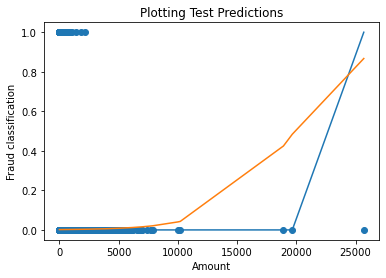

In [7]:
plt.scatter(x_test,y_test)
plt.xlabel('Amount')
plt.ylabel('Fraud classification')
plt.title('Plotting Test Predictions')
sns.lineplot(x=x_test, y=predict)
sns.lineplot(x=x_test, y=probability[:,1])

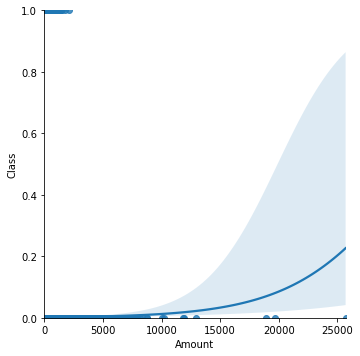

In [8]:
g = sns.lmplot(x="Amount", y="Class", data=credit_card_data, logistic=True)
g.set(xlim=(min(x_test), max(x_test)), ylim=(min(y_test), max(y_test)))

## Question 5: 15 pts

* **Compute the label-based criteria** we discussed in the Lesson for your amount-only classifier **using the test data**. Use a threshold of 0.5. 


* **Answer the questions** in this text box below:

    **1. How many of the test instances are labeled positive by your classifier?**

    Only 1 

    **2. Choose one of the positively-labeled test instances, and explain why the classifier labeled    it positive.**

    I believe this is because the value of this instance is sooo large

    **3. Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.**

    No, it does not give us much information


In [9]:
## Put code here to compute whatever else you might need to answer the question.
np.count_nonzero(predict)

1

In [10]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
compute_performance((clf.predict(x_test.reshape(-1, 1))>0.5).astype(int),y_test,clf.classes_) 

tp: 0 tn: 142160 fp: 1 fn: 243
Accuracy: 0.998 Recall: 0.0 Precision: 0.0 Sensitivity: 0.0 Specificity: 1.0


## Question 6: /10 pts
* Now **fit a logistic regression model to the training data** and include all the variables in the data frame in the cell below. You will want to make a new object like you did for the simpler model. 


* **Answer the following question?**
   According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

   Smaller Amounts are more strongly associated with fraud. But only minutely (coefficient = -6.06417740e-03)


In [11]:
# Code for Question 6
x = credit_card_data.drop('Class', 1).values
y = credit_card_data['Class'].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5, random_state=0)

/var/folders/rg/tckxgbls0dxbts7d9cbxrv2m0000gn/T/ipykernel_4639/3585774988.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = credit_card_data.drop('Class', 1).values


In [12]:
LogReg = LogisticRegression(max_iter=10000)
LogReg.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [13]:
LogReg.coef_

array([[-5.88585450e-05,  4.73546218e-01, -3.67296732e-01,
        -1.13915993e+00,  1.70237513e-01, -1.58268541e-01,
        -5.72568670e-02,  9.01835947e-01, -5.03149121e-01,
        -6.04458114e-01, -5.10117835e-01, -6.41397942e-01,
         1.37494242e-01, -4.98387261e-01, -8.33541908e-01,
        -1.00271880e+00, -4.44387646e-01, -4.40073274e-01,
         1.95096794e-01, -3.57336201e-02,  2.87471859e-01,
         6.73993698e-01,  6.73905033e-01,  8.54149708e-02,
        -6.25393668e-02, -8.83084802e-01,  2.03605505e-01,
        -1.36680975e-01,  1.27718532e-01, -6.06417740e-03]])

## Question 7: /15 pts

In the cell below:
* Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. 


* Answer the questions in this text box below.

  **1. How many of the test instances are labeled positive by your classifier?**

   146 True Positive, 31 False Positive, Total = 177

  **2. Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

   This is much much better, with a more appropriate confusion matrix for the data provided.


In [14]:
predict2 = LogReg.predict(xtest)
probability2 = LogReg.predict_proba(xtest)
compute_performance((predict2>0.5).astype(int), ytest, LogReg.classes_)

tp: 146 tn: 142130 fp: 31 fn: 97
Accuracy: 0.999 Recall: 0.601 Precision: 0.825 Sensitivity: 0.601 Specificity: 1.0


# Question 8: /15 pts

* Plot **ROC curves** for **both of your classifiers** using the cells below. 


* Then answer the following questions, computing whatever quantities you need to answer them.

  **1. Which classifier** has a higher estimated probability of correctly distinguishing between a positive and a negative instance? **How do you know?**

   The multivariate classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance. I know this because, it has a higher precision and sensitivity.

 **2. How could you explain** a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

   The predicted false positives are greater than the predicted true positives over its entire testing set.


/Users/joelmiller/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ROC Curve')

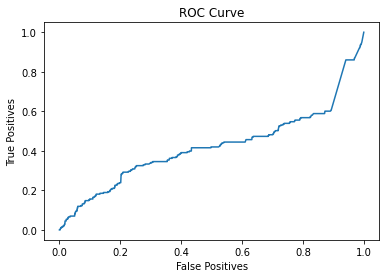

In [15]:
# ROC for Amount-only classifier
fpr, tpr, _ = roc_curve(y_test, probability[:,1])
ax=sns.lineplot(fpr,tpr)
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('ROC Curve')

/Users/joelmiller/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ROC Curve')

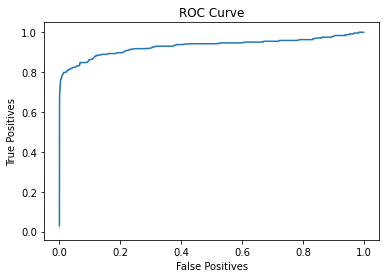

In [16]:
# ROC for all-variable classifier
fpr, tpr, _ = roc_curve(ytest, probability2[:,1])
ax=sns.lineplot(fpr,tpr)
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('ROC Curve')

# Question 9: /15 pts

**1. Plot precision-recall curves for both of your classifiers** using the cell below. Be sure to **label your axes**.


**2. Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?**

   The "All-variable" classifier.


Text(0.5, 1.0, 'Precision Recall curve for amount')

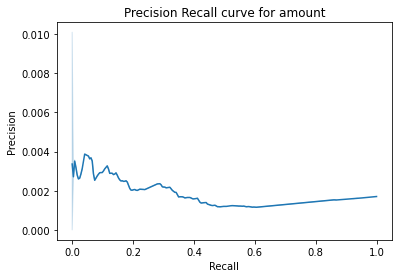

In [17]:
# PRC for Amount-only classifier
precision, recall, _ = precision_recall_curve(y_test, probability[:,1])
ax=sns.lineplot(x=recall, y=precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve for amount')

Text(0.5, 1.0, 'Precision Recall curve for amount')

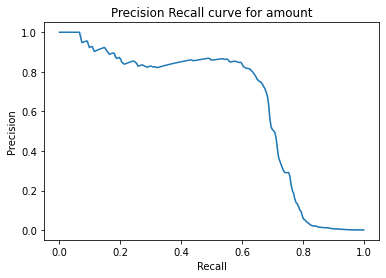

In [18]:
# PRC for all-variable classifier
precision, recall, _ = precision_recall_curve(ytest, probability2[:,1])
ax=sns.lineplot(x=recall, y=precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve for amount')